In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('matches.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
df.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [6]:
# 1. Calculate the total number of matches played in each season
df['season'].value_counts()

season
2013       76
2022       74
2012       74
2023       74
2011       73
2024       71
2019       60
2016       60
2009/10    60
2021       60
2020/21    60
2014       60
2018       60
2017       59
2015       59
2007/08    58
2009       57
Name: count, dtype: int64

In [18]:
# 2. Find the most successful team (team with the most wins)
df['winner'].value_counts().head(5)

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Name: count, dtype: int64

In [11]:
df['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [12]:
# 3. Find the average margin of victory by wickets and by runs 
avg_margin_runs = df[df["result"] == "runs"]["result_margin"].mean()

avg_margin_wickets = df[df["result"] == "wickets"]["result_margin"].mean()

avg_margin_runs, avg_margin_wickets


(np.float64(30.104417670682732), np.float64(6.192041522491349))

In [14]:
# 4. Which player won the most 'Player of the Match' awards? 
df['player_of_match'].value_counts().head(3)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
Name: count, dtype: int64

In [15]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [19]:
# 5. Find the number of matches where the toss winner won the match 
print((df['toss_winner'] == df['winner']).sum())

554


In [49]:
# 6. Calculate the total number of runs scored in all matches for each team 
print(df.groupby('team1')['target_runs'].sum())
# print(df.groupby('team2')['target_runs'].sum())

team1
Chennai Super Kings            21859.0
Deccan Chargers                 6266.0
Delhi Capitals                  7097.0
Delhi Daredevils               13424.0
Gujarat Lions                   2670.0
Gujarat Titans                  3732.0
Kings XI Punjab                15275.0
Kochi Tuskers Kerala            1019.0
Kolkata Knight Riders          19599.0
Lucknow Super Giants            4012.0
Mumbai Indians                 20580.0
Pune Warriors                   3373.0
Punjab Kings                    5242.0
Rajasthan Royals               16626.0
Rising Pune Supergiant          1145.0
Rising Pune Supergiants         1072.0
Royal Challengers Bangalore    22186.0
Royal Challengers Bengaluru     1767.0
Sunrisers Hyderabad            13983.0
Name: target_runs, dtype: float64


In [24]:
# 7. Determine the average number of wickets taken by the winning team in each match 

df["wickets_taken"] = df.apply(lambda row: 10 if row["result"] == "runs" else (10 - row["result_margin"]), axis=1)

average_wickets_taken = int(df["wickets_taken"].mean())

print("Average number of wickets taken by the winning team:", average_wickets_taken)


Average number of wickets taken by the winning team: 6


In [25]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,wickets_taken
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,10.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,10.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,1.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,5.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,5.0


In [26]:
df['super_over'].unique()

array(['N', 'Y'], dtype=object)

In [36]:
# 8. How many matches were decided by a Super Over? 

print((df['super_over'] == 'Y').sum())

14


<Axes: xlabel='result', ylabel='Count'>

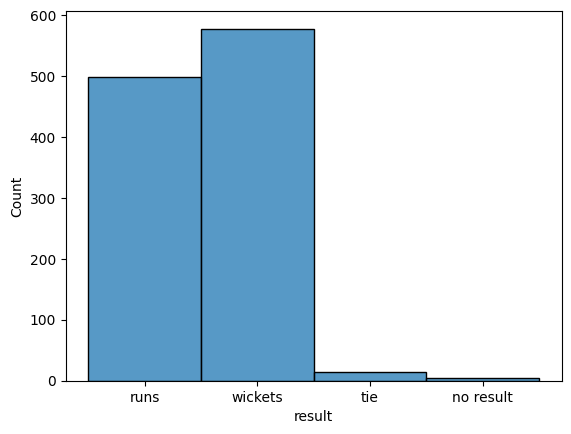

In [40]:
# 9. Find the distribution of match results (runs vs wickets) 

sns.histplot(data=df, x="result", discrete=True )


In [41]:
# 10. Find the top 5 venues with the most matches played 

df['venue'].value_counts().head(5)

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64

In [43]:
# 11. Find the match with the highest margin of victory (by wickets or runs) 
max_runs_match = df[df["result"] == "runs"].loc[df[df["result"] == "runs"]["result_margin"].idxmax()]

max_wickets_match = df[df["result"] == "wickets"].loc[df[df["result"] == "wickets"]["result_margin"].idxmax()]

print("Match with highest margin of victory by runs:\n", max_runs_match)
print("\nMatch with highest margin of victory by wickets:\n", max_wickets_match)



Match with highest margin of victory by runs:
 id                          1082635
season                         2017
city                          Delhi
date                     2017-05-06
match_type                   League
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
team1              Delhi Daredevils
team2                Mumbai Indians
toss_winner        Delhi Daredevils
toss_decision                 field
winner               Mumbai Indians
result                         runs
result_margin                 146.0
target_runs                   213.0
target_overs                   20.0
super_over                        N
method                          NaN
umpire1                 Nitin Menon
umpire2                   CK Nandan
wickets_taken                  10.0
Name: 620, dtype: object

Match with highest margin of victory by wickets:
 id                                     335994
season                                2007/08
city                         

In [44]:
# 12. Calculate the win percentage for each team 

matches_played = df['team1'].value_counts() + df['team2'].value_counts()

matches_won = df['winner'].value_counts()

win_percentage = (matches_won / matches_played) * 100

win_percentage = win_percentage.fillna(0).sort_values(ascending=False)

print(win_percentage)


Rising Pune Supergiant         62.500000
Gujarat Titans                 62.222222
Chennai Super Kings            57.983193
Mumbai Indians                 55.172414
Lucknow Super Giants           54.545455
Delhi Capitals                 52.747253
Kolkata Knight Riders          52.191235
Rajasthan Royals               50.678733
Sunrisers Hyderabad            48.351648
Royal Challengers Bangalore    48.333333
Royal Challengers Bengaluru    46.666667
Kings XI Punjab                46.315789
Gujarat Lions                  43.333333
Punjab Kings                   42.857143
Kochi Tuskers Kerala           42.857143
Delhi Daredevils               41.614907
Deccan Chargers                38.666667
Rising Pune Supergiants        35.714286
Pune Warriors                  26.086957
Name: count, dtype: float64


In [45]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,wickets_taken
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,10.0
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,10.0
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,1.0
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,5.0
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,5.0


In [46]:
# 13. Find the average number of overs played in all matches

average_overs = df["target_overs"].mean()

print("Average number of overs played in all matches:", average_overs)



Average number of overs played in all matches: 19.75934065934066


In [47]:
# 14. Find the most common match outcome (runs, wickets, or no result) 

common_outcome = df["result"].value_counts()

print("Most common match outcome:\n", common_outcome)


Most common match outcome:
 result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


In [51]:
# 15. Find the total number of matches played at each venue by year 

matches_per_venue_per_year = df.groupby(["season", "venue"]).size().reset_index(name="matches_played")

print(matches_per_venue_per_year)



      season                                              venue  \
0    2007/08                         Dr DY Patil Sports Academy   
1    2007/08                                       Eden Gardens   
2    2007/08                                   Feroz Shah Kotla   
3    2007/08                              M Chinnaswamy Stadium   
4    2007/08                    MA Chidambaram Stadium, Chepauk   
..       ...                                                ...   
170     2024  Maharaja Yadavindra Singh International Cricke...   
171     2024                   Narendra Modi Stadium, Ahmedabad   
172     2024  Rajiv Gandhi International Stadium, Uppal, Hyd...   
173     2024                     Sawai Mansingh Stadium, Jaipur   
174     2024                           Wankhede Stadium, Mumbai   

     matches_played  
0                 4  
1                 7  
2                 6  
3                 7  
4                 7  
..              ...  
170               5  
171               8

Text(0.5, 1.0, 'Win Margin Distribution by Year')

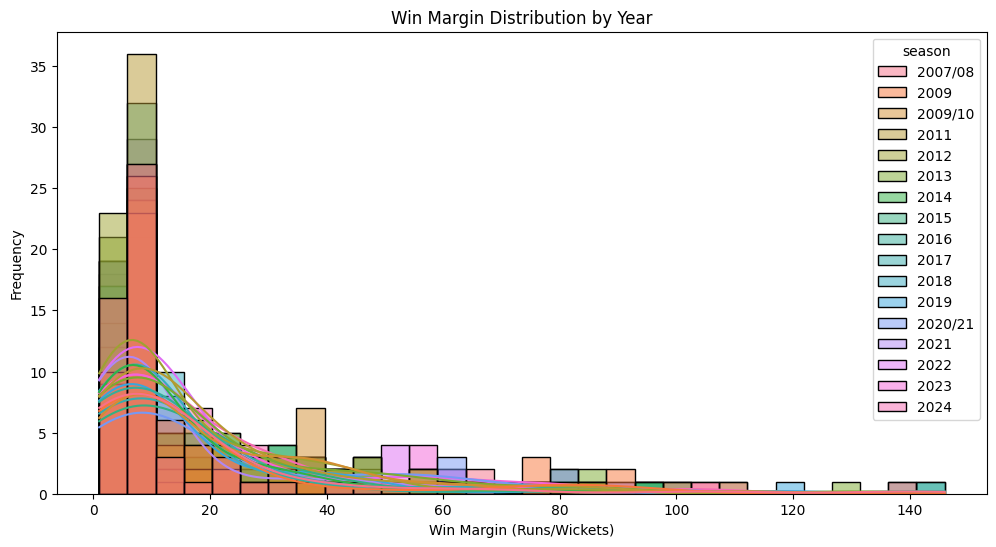

In [53]:
# 16. Analyze the win margin distribution by year 


plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="result_margin", hue="season", bins=30, kde=True)

plt.xlabel("Win Margin (Runs/Wickets)")
plt.ylabel("Frequency")
plt.title("Win Margin Distribution by Year")



In [55]:
df['result'].value_counts()

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64

In [60]:
# 17. Calculate the total number of 'no result' matches and their impact on the tournament 

total_matches = len(df)

no_result_matches = (df["result"] == "no result").sum()

no_result_percentage = (no_result_matches / total_matches) * 100

print(f"Total 'No Result' Matches: {no_result_matches}")
print(f"Percentage of 'No Result' Matches: {no_result_percentage:.2f}%")


Total 'No Result' Matches: 5
Percentage of 'No Result' Matches: 0.46%


In [61]:
# 18. How many matches were won by teams batting first vs. batting second? 

batting_first_wins = (df["winner"] == df["team1"]).sum()

batting_second_wins = (df["winner"] == df["team2"]).sum()

print(f"Matches won by teams batting first: {batting_first_wins}")
print(f"Matches won by teams batting second: {batting_second_wins}")


Matches won by teams batting first: 555
Matches won by teams batting second: 535


In [64]:
# 19. Find out the average number of runs scored by the winning team
 
if "winner" in df.columns and "target_runs" in df.columns:
    winning_team_runs = df.groupby("winner")["target_runs"].mean()
    
    avg_winning_team_runs = winning_team_runs.mean()

    print(f"Average runs scored by the winning team: {avg_winning_team_runs:.2f}")
else:
    print("Columns required for calculation are missing. Check if 'total_runs' exists.")



Average runs scored by the winning team: 163.76


In [ ]:
# 20. Identify the most successful captain (team with the most wins under a captain) 



C:\Users\Administrator\AppData\Local\Temp\ipykernel_7752\720299454.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wicket_win_counts.index, y=wicket_win_counts.values, palette="viridis")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0')])

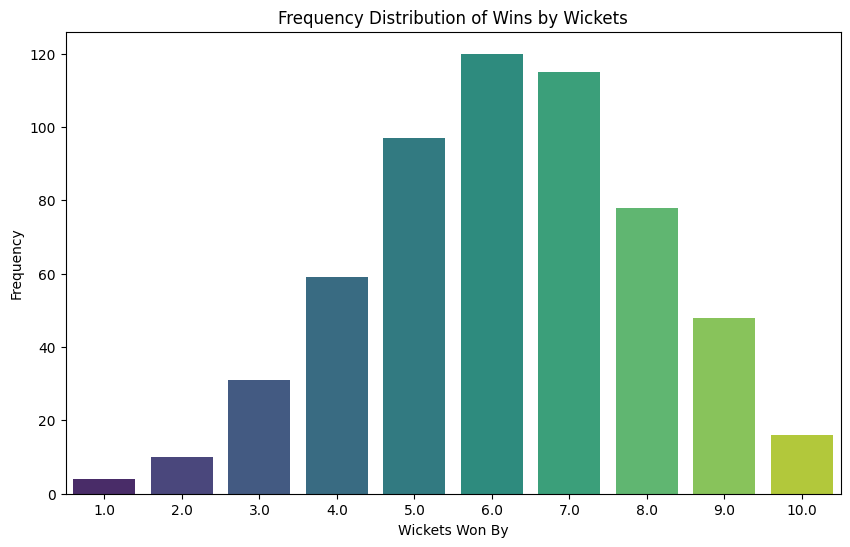

In [65]:
# 21. Frequency Distribution of Wins by Wickets


wicket_wins = df[df["result"] == "wickets"]

wicket_win_counts = wicket_wins["result_margin"].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=wicket_win_counts.index, y=wicket_win_counts.values, palette="viridis")

plt.xlabel("Wickets Won By")
plt.ylabel("Frequency")
plt.title("Frequency Distribution of Wins by Wickets")
plt.xticks(rotation=0)  


C:\Users\Administrator\AppData\Local\Temp\ipykernel_7752\431554892.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=relative_frequency.index, y=relative_frequency.values, palette="coolwarm")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0')])

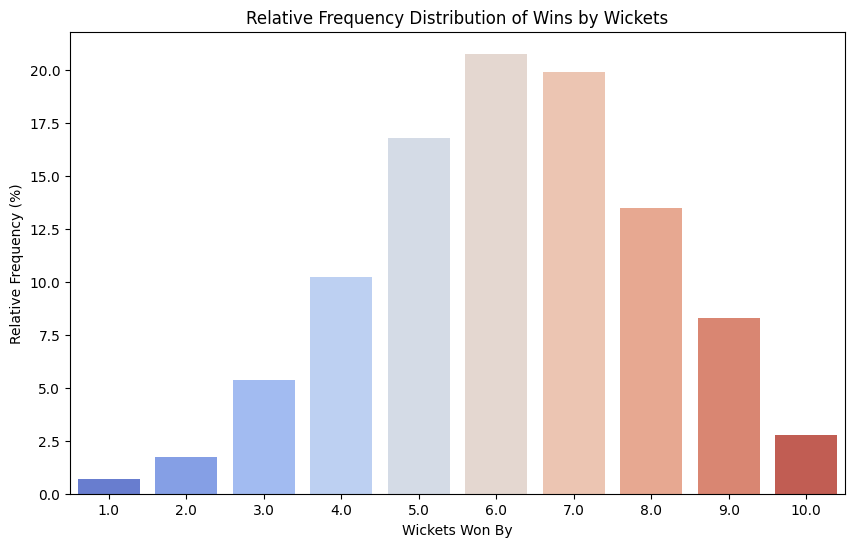

In [67]:
# 22. Relative Frequency Distribution

wicket_wins = df[df["result"] == "wickets"]

# Count frequency of each wicket margin
wicket_win_counts = wicket_wins["result_margin"].value_counts().sort_index()

# Calculate relative frequency
relative_frequency = (wicket_win_counts / wicket_win_counts.sum()) * 100  # Convert to percentage

# Plot the relative frequency distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=relative_frequency.index, y=relative_frequency.values, palette="coolwarm")

# Labels and Title
plt.xlabel("Wickets Won By")
plt.ylabel("Relative Frequency (%)")
plt.title("Relative Frequency Distribution of Wins by Wickets")
plt.xticks(rotation=0)  


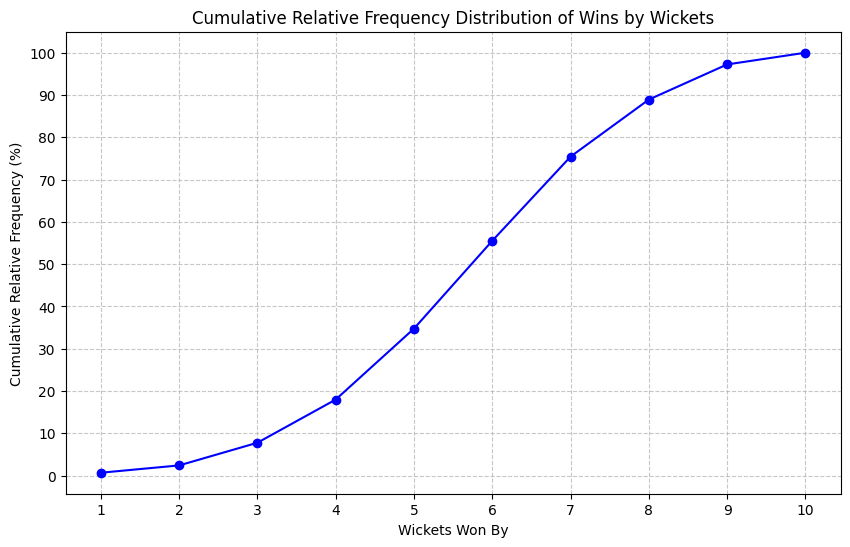

In [68]:
# 23. Cumulative Relative Frequency Graph


wicket_wins = df[df["result"] == "wickets"]

# Count frequency of each wicket margin
wicket_win_counts = wicket_wins["result_margin"].value_counts().sort_index()

# Calculate relative frequency
relative_frequency = (wicket_win_counts / wicket_win_counts.sum()) * 100  # Convert to percentage

# Compute cumulative relative frequency
cumulative_relative_frequency = np.cumsum(relative_frequency)

# Plot cumulative relative frequency graph
plt.figure(figsize=(10, 6))
plt.plot(relative_frequency.index, cumulative_relative_frequency, marker="o", linestyle="-", color="b")

# Labels and Title
plt.xlabel("Wickets Won By")
plt.ylabel("Cumulative Relative Frequency (%)")
plt.title("Cumulative Relative Frequency Distribution of Wins by Wickets")
plt.xticks(relative_frequency.index)  # Ensure all wicket values are displayed
plt.yticks(np.arange(0, 110, 10))  # Set y-axis range from 0 to 100%
plt.grid(True, linestyle="--", alpha=0.7)



In [69]:
# 24. Probability of Winning by 6 Wickets or Less

wicket_wins = df[df["result"] == "wickets"]

# Total matches won by wickets
total_wicket_wins = len(wicket_wins)

# Matches won by 6 wickets or less
wins_by_6_or_less = len(wicket_wins[wicket_wins["result_margin"] <= 6])

# Calculate probability
probability_6_or_less = wins_by_6_or_less / total_wicket_wins

print(f"Probability of winning by 6 wickets or less: {probability_6_or_less:.2f}")


Probability of winning by 6 wickets or less: 0.56


NameError: name 'stats' is not defined

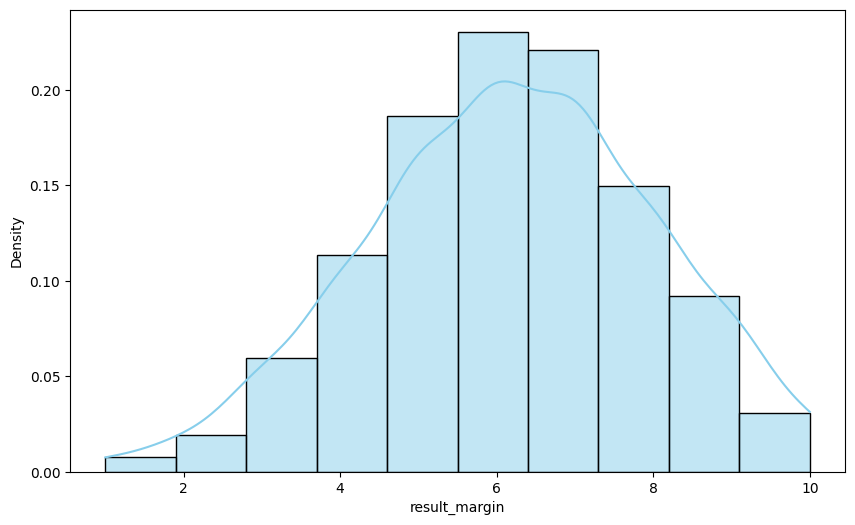

In [71]:
# 25. Normal Distribution of Wins by Wickets

wicket_wins = df[df["result"] == "wickets"]["result_margin"]

# Plot histogram with KDE (Kernel Density Estimation) to visualize distribution
plt.figure(figsize=(10, 6))
sns.histplot(wicket_wins, kde=True, bins=10, color="skyblue", stat="density")

# Overlay a normal distribution curve
mu, sigma = wicket_wins.mean(), wicket_wins.std()
x = np.linspace(wicket_wins.min(), wicket_wins.max(), 100)
pdf = stats.norm.pdf(x, mu, sigma)  # Generate normal distribution
plt.plot(x, pdf, color="red", linestyle="dashed", label="Normal Distribution")

# Labels and Title
plt.xlabel("Wickets Won By")
plt.ylabel("Density")
plt.title("Normal Distribution of Wins by Wickets")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Show plot
plt.show()


In [72]:
# 26. Mean, Standard Deviation, and Percentile Calculation

df.describe()

,id,result_margin,target_runs,target_overs,wickets_taken
count,1.095000e+03,1076.000000,1092.000000,1092.000000,1076.000000
mean,9.048283e+05,17.259294,165.684066,19.759341,6.673792
std,3.677402e+05,21.787444,33.427048,1.581108,3.371909
min,3.359820e+05,1.000000,43.000000,5.000000,0.000000
25%,5.483315e+05,6.000000,146.000000,20.000000,4.000000
50%,9.809610e+05,8.000000,166.000000,20.000000,7.000000
75%,1.254062e+06,20.000000,187.000000,20.000000,10.000000
max,1.426312e+06,146.000000,288.000000,20.000000,10.000000


In [73]:
# 27. Find out outliers for the selective columns for lower range outliers will be lower than mu - 2sigma, similarly for upper range outliers will be greater than mu+2sigma. 


import numpy as np

# Select the column (e.g., 'result_margin' for wins by wickets)
column_name = "result_margin"

# Filter only matches won by wickets
wicket_wins = df[df["result"] == "wickets"][column_name]

# Calculate Mean and Standard Deviation
mu = np.mean(wicket_wins)
sigma = np.std(wicket_wins, ddof=1)  # Sample standard deviation

# Define Lower and Upper Outlier Boundaries
lower_bound = mu - 2 * sigma
upper_bound = mu + 2 * sigma

# Identify Outliers
lower_outliers = wicket_wins[wicket_wins < lower_bound]
upper_outliers = wicket_wins[wicket_wins > upper_bound]

# Print Results
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("\nLower Range Outliers:")
print(lower_outliers)
print("\nUpper Range Outliers:")
print(upper_outliers)


Mean (μ): 6.19
Standard Deviation (σ): 1.85
Lower Bound: 2.50
Upper Bound: 9.88

Lower Range Outliers:
99      2.0
294     2.0
500     1.0
536     2.0
625     2.0
636     1.0
642     1.0
692     2.0
753     2.0
816     2.0
853     2.0
964     1.0
970     2.0
1054    2.0
Name: result_margin, dtype: float64

Upper Range Outliers:
12      10.0
60      10.0
124     10.0
239     10.0
317     10.0
332     10.0
482     10.0
531     10.0
579     10.0
611     10.0
683     10.0
772     10.0
796     10.0
811     10.0
831     10.0
1080    10.0
Name: result_margin, dtype: float64
